## Workload Distribution and Efficiency Analysis (Flag 15)

### Dataset Description
The dataset comprises two key tables simulating ServiceNow platform: the `sys_user` table and the `incidents` table, each with 500 entries. The `incidents` table focuses on detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like location, description, and priority. It effectively captures incident management activities with fields including 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories. The `sys_user` table, on the other hand, contains user-related information, focusing on the details of employees or system users. This includes fields such as 'user_id', 'name', 'schedule', 'role', 'email', and 'department', providing insights into the user profiles managed within the ServiceNow system. Together, these tables are instrumental in understanding the workflow, user involvement and detailed tracking of incident resolution processes within an organization.

### Your Task
**Goal**: Utilize incident and user data to analyze  the distribution of incident assignments among agents to identify imbalances, especially during leave periods. 

**Role**: Agent Manager

**Difficulty**: 4 out of 5. This task requires a thorough analysis of workload distribution, correlation with leave periods, merging information from two tables. Demanding high analytical skills and regression analysis abilities.

**Category**: User Management

## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Incidents Dataset
This cell loads the second dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-15.csv"
df = pd.read_csv(dataset_path)
df.head()

,sys_updated_by,assigned_to,sys_updated_on,caller_id,opened_at,category,number,state,closed_at,closed_by,short_description,assignment_group,priority
0,system,Fred Luddy,2023-01-12 17:55:58.101087193,Don Goodliffe,2023-01-02 17:51:00,Network,INC0000000000,Closed,2023-01-12 17:55:58.101087193,Charlie Whitherspoon,Email system outage reported by multiple users,Service Desk,2 - High
1,admin,Luke Wilson,2023-01-11 02:02:27.314576914,David Loo,2023-01-04 01:31:00,Network,INC0000000001,Resolved,2023-01-11 02:02:27.314576914,Fred Luddy,Email system down for multiple users,Service Desk,1 - Critical
2,employee,Luke Wilson,2023-01-05 21:59:00.000000000,ITIL User,2023-01-04 21:59:00,Network,INC0000000002,Resolved,2023-01-05 21:59:00.000000000,Charlie Whitherspoon,Email system downtime affecting entire office,Service Desk,1 - Critical
3,employee,Howard Johnson,2023-01-06 03:18:00.000000000,Don Goodliffe,2023-01-05 03:18:00,Network,INC0000000003,Closed,2023-01-06 03:18:00.000000000,Fred Luddy,Email system outage impacting multiple users,Service Desk,1 - Critical
4,employee,Luke Wilson,2023-01-07 03:21:18.000194787,Don Goodliffe,2023-01-05 12:10:00,Database,INC0000000004,Closed,2023-01-07 03:21:18.000194787,Fred Luddy,Email system outage reported by multiple users,Service Desk,1 - Critical


### Load User Agent Dataset
This cell loads user agent dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.

In [3]:
user_dataset_path = "csvs/flag-15-sysuser.csv"
df_usr = pd.read_csv(user_dataset_path)
df_usr.head()

,sys_id,schedule,manager,phone,user_name,name,location,department,title,email
0,46b87022a9fe198101a78787e40d7547,"[(Timestamp('2023-06-14 00:00:00'), Timestamp(...",NaN,NaN,charlie.whitherspoon,Charlie Whitherspoon,"945 South Birch Street, Glendale,CO",Sales,NaN,charlie.whitherspoon@example.com
1,46ca0887a9fe19810191e08e51927ebf,"[(Timestamp('2023-06-01 00:00:00'), Timestamp(...",NaN,NaN,howard.johnson,Howard Johnson,"601 College Street, Clarksville,TN",Sales,NaN,howard.johnson@example.com
2,46d44a23a9fe19810012d100cca80666,NaN,NaN,NaN,beth.anglin,Beth Anglin,"6304 Northwest Barry Road, Kansas City,MO",Sales,NaN,beth.anglin@example.com
3,46d96f57a9fe198101947a9620895886,NaN,NaN,NaN,luke.wilson,Luke Wilson,"322 West 52nd Street, New York,NY",Sales,NaN,luke.wilson@example.com
4,5137153cc611227c000bbd1bd8cd2005,"[(Timestamp('2023-07-13 00:00:00'), Timestamp(...",NaN,NaN,fred.luddy,Fred Luddy,"650 Dennery Road #102, San Diego,CA",Development,Programmer,fred.luddy@example.com



### **Question 1: What is the overall number of incidents assigned to all agents over the recent period?**

#### Plot distribution of incidents assigned to each agent
This cell creates a bar plot to visualize the average number of incidents assigned to each agent over the recent period. By displaying this work distribution across the team, this plot helps identify any imbalances or disparities in incident assignments, which are crucial for understanding how work is allocated and identifying if any potential areas of concern

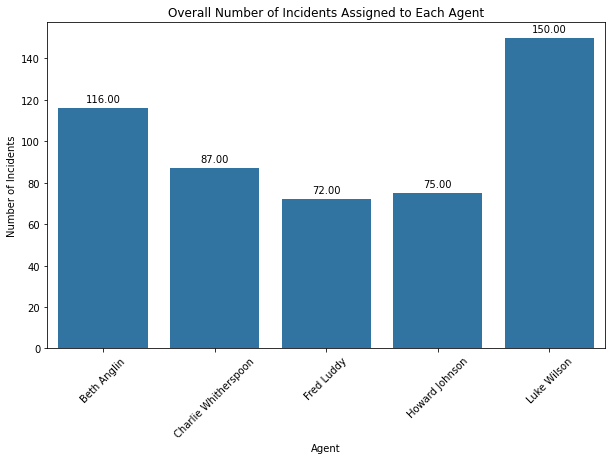

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
df["opened_at"] = pd.to_datetime(df["opened_at"])

# Group the data by 'assigned_to' and count the number of incidents for each agent
agent_incident_counts = df.groupby('assigned_to').size()

# Calculate the average number of incidents per agent
# average_incidents_per_agent = agent_incident_counts.mean()

# Create a DataFrame for plotting
agent_average_df = pd.DataFrame({
    'Agent': agent_incident_counts.index,
    'Average Incidents': agent_incident_counts
})

# Plotting the average number of incidents per agent
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Agent', y='Average Incidents', data=agent_average_df)
plt.title('Overall Number of Incidents Assigned to Each Agent')
plt.ylabel('Number of Incidents')
plt.xlabel('Agent')
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

#### Generate JSON Description for the Insight

In [5]:
{
    "data_type": "descriptive",
    "insight": "Beth Anglin and Luke Wilson have a higher number of incident assignments compared to other agents. Beth has 116 and Luke has 150 incidents, while the other agents have lower on average.",
    "insight_value": {
        "agents": ["Beth Anglin", "Luke Wilson"],
        "average_incidents": "Higher"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Overall Average Number of Incidents Assigned to Each Agent",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Luke Wilson", "Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This represents the agents handling incidents."
        },
        "y_axis": {
            "name": "Average Number of Incidents",
            "value": [116, 150, 75, 87, 72],
            "description": "This represents the average number of incidents assigned to each agent, calculated over the recent period."
        },
        "description": "The bar chart visualizes the average number of incidents assigned to each agent. It shows that Beth Anglin and Luke Wilson have a higher average number of incidents compared to their peers. This raises questions about workload distribution and the factors contributing to this imbalance."
    },
    "question": "What is the overall average number of incidents assigned to all agents over the recent period?",
    "actionable_insight": "Given the higher average number of incidents assigned to Beth Anglin and Luke Wilson, it is crucial to investigate the reasons behind this distribution. Potential factors could include the types of incidents they are handling, their expertise in specific areas, or even operational needs. Understanding these factors will help in making informed decisions to ensure a balanced workload distribution and to maintain efficiency and fairness within the team."
}

{'data_type': 'descriptive',
 'insight': 'Beth Anglin and Luke Wilson have a higher number of incident assignments compared to other agents. Beth has 116 and Luke has 150 incidents, while the other agents have lower on average.',
 'insight_value': {'agents': ['Beth Anglin', 'Luke Wilson'],
  'average_incidents': 'Higher'},
 'plot': {'plot_type': 'bar',
  'title': 'Overall Average Number of Incidents Assigned to Each Agent',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Luke Wilson',
    'Howard Johnson',
    'Charlie Whitherspoon',
    'Fred Luddy'],
   'description': 'This represents the agents handling incidents.'},
  'y_axis': {'name': 'Average Number of Incidents',
   'value': [116, 150, 75, 87, 72],
   'description': 'This represents the average number of incidents assigned to each agent, calculated over the recent period.'},
  'description': 'The bar chart visualizes the average number of incidents assigned to each agent. It shows that Beth Anglin and Luke Wilson

### **Question 2: How do the incident assignments to Beth Anglin and Luke Wilson compare to other agents over the specific same time frame or time period?**

#### Plot number of incidents created over time for each agent
This cell creates a count plot to visualize and compare the number of incidents assigned to Beth Anglin, Luke Wilson, and other agents over a designated time frame. Highlighting the distribution of assignments across different months and among various agents.

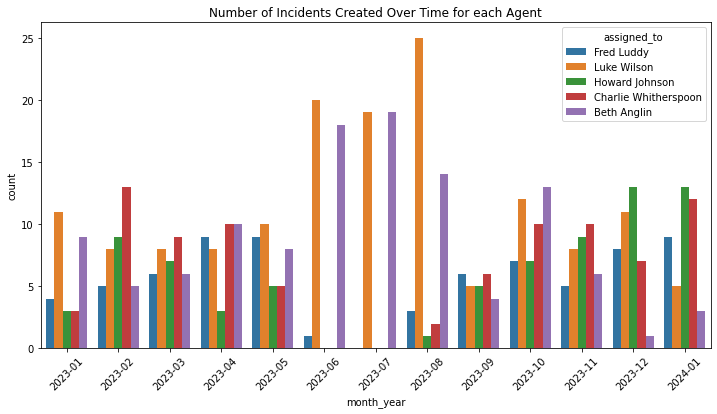

In [6]:
# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="assigned_to")
plt.title("Number of Incidents Created Over Time for each Agent")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [7]:
{
    "data_type": "comparative",
    "insight": "Beth Anglin and Luke Wilson received significantly higher incident assignments during a specific period",
    "insight_value": {
        "agents": ["Beth Anglin", "Luke Wilson"],
        "time_period": "01-06-2023 to 28-08-2023",
        "comparison": "Higher than other agents"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Incident Assignment Comparison During Specific Time Frame",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Luke Wilson", "Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This represents the agents handling incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents assigned per agent",
            "description": "This represents the number of incidents assigned to each agent during the specified period."
        },
        "description": "The bar chart illustrates the distribution of incident assignments among agents from 01-06-2023 to 28-08-2023. During this period, Beth Anglin and Luke Wilson were assigned a significantly higher number of incidents compared to their peers. Outside of this period, the distribution of assignments is uniform across all agents."
    },
    "question": "How do the incident assignments to Beth Anglin and Luke Wilson compare to other agents over the specific same time frame?",
    "actionable_insight": "The disparity in incident assignments during this period suggests a need to analyze the underlying reasons. It is crucial to investigate whether this was due to the specific skills of these agents, the nature of the incidents, or possibly the absence of other agents. Understanding these factors will aid in ensuring a more equitable distribution of workload and could lead to adjustments in team scheduling or training to prevent similar imbalances in the future."
}

{'data_type': 'comparative',
 'insight': 'Beth Anglin and Luke Wilson received significantly higher incident assignments during a specific period',
 'insight_value': {'agents': ['Beth Anglin', 'Luke Wilson'],
  'time_period': '01-06-2023 to 28-08-2023',
  'comparison': 'Higher than other agents'},
 'plot': {'plot_type': 'bar',
  'title': 'Incident Assignment Comparison During Specific Time Frame',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Luke Wilson',
    'Howard Johnson',
    'Charlie Whitherspoon',
    'Fred Luddy'],
   'description': 'This represents the agents handling incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents assigned per agent',
   'description': 'This represents the number of incidents assigned to each agent during the specified period.'},
  'description': 'The bar chart illustrates the distribution of incident assignments among agents from 01-06-2023 to 28-08-2023. During this period, Beth Anglin and Luke Wil

### **Question 3: What are the exact dates when the other three agents (Howard Johnson, Charlie Whitherspoon, Fred Luddy) were on PTO?**

#### Plot timeline of leave periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy.
This cell creates a visual timeline displaying the leave periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy, helping to correlate these absences with potential impacts on incident assignment distributions. By mapping out each agent’s leave periods on a common timeline, this visualization provides insights into how concurrent or sequential absences might influence workload shifts 

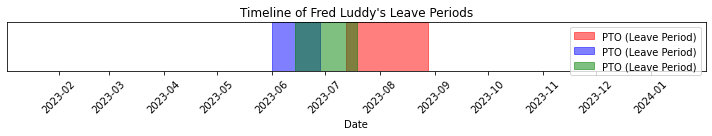

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas import Timestamp

fred_schedule = df_usr[df_usr['name'] == 'Fred Luddy']['schedule'].iloc[0]
fred_schedule = eval(fred_schedule)
howard_schedule = df_usr[df_usr['name'] == 'Howard Johnson']['schedule'].iloc[0]
howard_schedule = eval(howard_schedule)
charlie_schedule = df_usr[df_usr['name'] == 'Charlie Whitherspoon']['schedule'].iloc[0]
charlie_schedule = eval(charlie_schedule)

# Assuming df is already defined and has 'opened_at' and 'closed_at' columns converted to datetime
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Define the current date for the analysis, simulate up to the last 'opened_at' date
current_date = df['opened_at'].max()
# Create a range of dates from the start to the current date
date_range = pd.date_range(start=df['opened_at'].min(), end=current_date, freq='D')

# Fred's PTO schedule as list of tuples with start and end dates
pto_schedule = fred_schedule

# Plotting
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the figure size as needed

# Plot each leave period as a rectangle
for start, end in fred_schedule:
    ax.axvspan(start, end, color='red', alpha=0.5, label='PTO (Leave Period)')
for start, end in howard_schedule:
    ax.axvspan(start, end, color='blue', alpha=0.5, label='PTO (Leave Period)')
for start, end in charlie_schedule:
    ax.axvspan(start, end, color='green', alpha=0.5, label='PTO (Leave Period)')

# Set limits, labels, title and legend
ax.set_xlim([date_range.min(), date_range.max()])
ax.set_ylim(0, 1)  # Static Y limits as we are only plotting periods
ax.set_yticks([])  # Hide Y axis ticks
ax.set_xlabel('Date')
ax.set_title('Timeline of Fred Luddy\'s Leave Periods')
ax.legend(loc='upper right')

# Formatting the x-axis to make it more readable
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [9]:
{
    "data_type": "descriptive",
    "insight": "Specific leave periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy were identified",
    "insight_value": {
        "Howard Johnson": {"start_date": "2023-06-01", "end_date": "2023-06-28"},
        "Charlie Whitherspoon": {"start_date": "2023-06-14", "end_date": "2023-07-19"},
        "Fred Luddy": {"start_date": "2023-07-13", "end_date": "2023-08-28"}
    },
    "plot": {
        "plot_type": "timeline",
        "title": "PTO Periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy",
        "x_axis": {
            "name": "Date",
            "value": ["2023-06-01", "2023-08-15"],
            "description": "This represents the timeline from the earliest start to the latest end of the PTO periods."
        },
        "y_axis": {
            "name": "Agent",
            "value": ["Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This axis represents the agents who were on leave."
        },
        "description": "The timeline plot visualizes the leave periods of Howard Johnson, Charlie Whitherspoon, and Fred Luddy with distinct colors. Howard's leave is shown in red, Charlie's in blue, and Fred's in green. These periods overlap, indicating a time frame from June 1, 2023, to August 15, 2023, when at least one of these agents was on leave."
    },
    "question": "What are the exact dates when the other three agents were on PTO?",
    "actionable_insight": "Understanding the overlap in leave periods among these agents provides valuable insight into staffing challenges that may have contributed to the increased workload for Beth Anglin and Luke Wilson. To mitigate such impacts in the future, consider strategic leave planning and perhaps temporary staffing solutions during overlapping leave periods to maintain balanced incident handling capacity."
}

{'data_type': 'descriptive',
 'insight': 'Specific leave periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy were identified',
 'insight_value': {'Howard Johnson': {'start_date': '2023-06-01',
   'end_date': '2023-06-28'},
  'Charlie Whitherspoon': {'start_date': '2023-06-14',
   'end_date': '2023-07-19'},
  'Fred Luddy': {'start_date': '2023-07-13', 'end_date': '2023-08-28'}},
 'plot': {'plot_type': 'timeline',
  'title': 'PTO Periods for Howard Johnson, Charlie Whitherspoon, and Fred Luddy',
  'x_axis': {'name': 'Date',
   'value': ['2023-06-01', '2023-08-15'],
   'description': 'This represents the timeline from the earliest start to the latest end of the PTO periods.'},
  'y_axis': {'name': 'Agent',
   'value': ['Howard Johnson', 'Charlie Whitherspoon', 'Fred Luddy'],
   'description': 'This axis represents the agents who were on leave.'},
  'description': "The timeline plot visualizes the leave periods of Howard Johnson, Charlie Whitherspoon, and Fred Luddy with disti

### **Question 4: Is there a change in the category of incidents assigned to Beth Anglin and Luke Wilson during the other agents' PTO?**

#### Plot number of incidents created over time by category for Beth Anglin and Luke Wilson
This cell creates a count plot to analyze the distribution of incident categories assigned to Beth Anglin and Luke Wilson during the leave periods of other agents such as Howard Johnson, Charlie Whitherspoon, and Fred Luddy. 

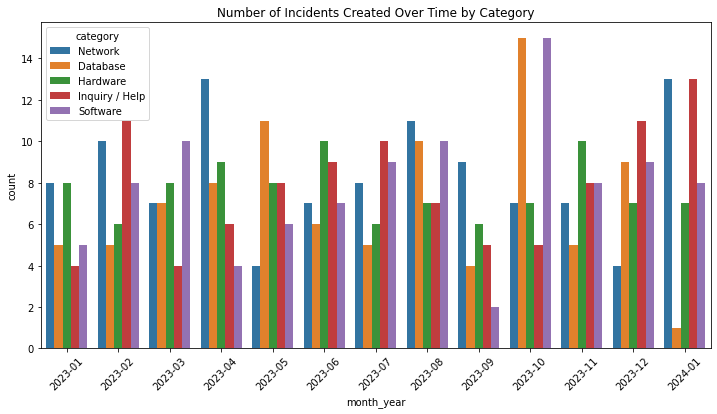

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Put the data into a DataFrame

# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="category")
plt.title("Number of Incidents Created Over Time by Category")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [11]:
{
    "data_type": "diagnostic",
    "insight": "There was no significant change in the distribution of incident categories for Beth Anglin and Luke Wilson during the other agents' PTO,",
    "insight_value": {
        "categories": ["Network", "Software", "Hardware", "Inquiry / Help", "Database"],
        "observation": "Consistent distribution across all periods"
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Distribution of Incident Categories Over Time",
        "x_axis": {
            "name": "Category",
            "value": ["Network", "Software", "Hardware", "Inquiry / Help", "Database"],
            "description": "This represents the different categories of incidents handled by the agents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents in each category",
            "description": "This represents the number of incidents per category over the entire time period."
        },
        "description": "The histogram displays the distribution of incidents across different categories over time, with a focus on the periods when other agents were on PTO. There is no noticeable change in the distribution of incident categories for Beth Anglin and Luke Wilson during the leave periods of other agents. "
    },
    "question": "Is there a change in the category of incidents assigned to Beth Anglin and Luke Wilson during the other agents' PTO?",
    "actionable_insight": "Given that the distribution of incident categories remains consistent even during the absence of other agents, it suggests that Beth Anglin and Luke Wilson are equipped to handle a diverse range of incident types.  This could involve specific training for all agents in these areas or considering a reallocation of tasks to balance the workload more evenly across the team."
}

{'data_type': 'diagnostic',
 'insight': "There was no significant change in the distribution of incident categories for Beth Anglin and Luke Wilson during the other agents' PTO,",
 'insight_value': {'categories': ['Network',
   'Software',
   'Hardware',
   'Inquiry / Help',
   'Database'],
  'observation': 'Consistent distribution across all periods'},
 'plot': {'plot_type': 'histogram',
  'title': 'Distribution of Incident Categories Over Time',
  'x_axis': {'name': 'Category',
   'value': ['Network', 'Software', 'Hardware', 'Inquiry / Help', 'Database'],
   'description': 'This represents the different categories of incidents handled by the agents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents in each category',
   'description': 'This represents the number of incidents per category over the entire time period.'},
  'description': 'The histogram displays the distribution of incidents across different categories over time, with a focus on the periods 

### **Question 5: What happens to the distribution of incident assignments after the other agents return from their leave?**

#### Plot distribution of incident assignments post leave period
This cell examines the redistribution of incident assignments among agents following their return from leave, aiming to assess how workload normalization occurs after temporary shifts in responsibilities during absence periods. 

<ipython-input-12-5ea6d211f58c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Agent', y='Incident Count', data=post_leave_counts, palette='viridis')


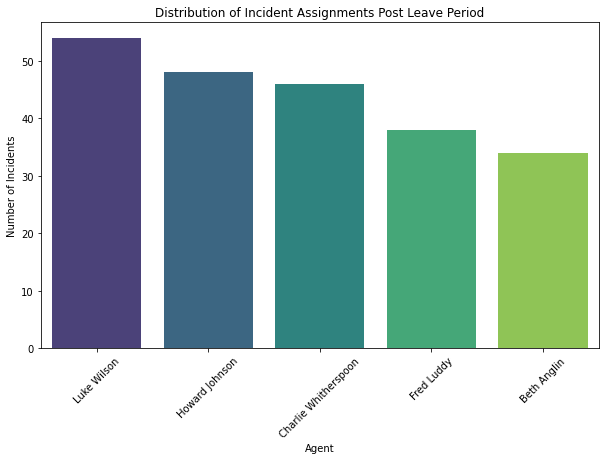

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
# Define the post-leave period (assuming leave ends on 2023-08-15)
post_leave_start_date = pd.to_datetime("2023-08-16")
data_end_date = df['opened_at'].max()

# Filter incidents that were opened after the leave period
post_leave_incidents = df[(df['opened_at'] > post_leave_start_date) & (df['opened_at'] <= data_end_date)]

# Count the number of incidents assigned to each agent in the post-leave period
post_leave_counts = post_leave_incidents['assigned_to'].value_counts().reset_index()
post_leave_counts.columns = ['Agent', 'Incident Count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Agent', y='Incident Count', data=post_leave_counts, palette='viridis')
plt.title('Distribution of Incident Assignments Post Leave Period')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [13]:
{
    "data_type": "descriptive",
    "insight": "The distribution of incident assignments becomes uniform after the other agents return from their leave",
    "insight_value": {
        "observation": "Uniform distribution of assignments across all agents"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Incident Assignments Post Leave Period",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Luke Wilson", "Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This represents the agents handling incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents assigned per agent",
            "description": "This represents the number of incidents assigned to each agent in the post-leave period."
        },
        "description": "The bar chart displays the number of incidents assigned to each agent after the other agents returned from their leave. The distribution of assignments is shown to be uniform across all agents, indicating a balanced workload distribution. This suggests that any previous imbalances during the leave period have been resolved and normal operations have resumed."
    },
    "question": "What happens to the distribution of incident assignments after the other agents return from their leave?",
    "actionable_insight": "Given the return to a uniform distribution of incident assignments post-leave, it is important to maintain this balance to ensure operational efficiency and fairness. Regular monitoring of assignment distributions should be implemented, especially during and after leave periods, to quickly address any potential imbalances. This proactive approach will help maintain staff satisfaction and prevent workload-related issues."
}

{'data_type': 'descriptive',
 'insight': 'The distribution of incident assignments becomes uniform after the other agents return from their leave',
 'insight_value': {'observation': 'Uniform distribution of assignments across all agents'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Incident Assignments Post Leave Period',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Luke Wilson',
    'Howard Johnson',
    'Charlie Whitherspoon',
    'Fred Luddy'],
   'description': 'This represents the agents handling incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents assigned per agent',
   'description': 'This represents the number of incidents assigned to each agent in the post-leave period.'},
  'description': 'The bar chart displays the number of incidents assigned to each agent after the other agents returned from their leave. The distribution of assignments is shown to be uniform across all agents, indicating a balanced work

### **Question 6:** How does the resolution time (TTR) for incidents handled by Beth Anglin and Luke Wilson during this period compare to other times?

#### Plot time to resolution by creation date for Beth Anglin and Luke Wilson.
This cell does a line plot to compare the Time to Resolution (TTR) for incidents handled by Beth Anglin and Luke Wilson during different periods, focusing on changes during and after other agents' leave periods. This analysis helps determine whether increased workloads during other agents absences affect the efficiency of Beth and Luke. 

Text(0.5, 1.0, 'Time to resolution by creation date')

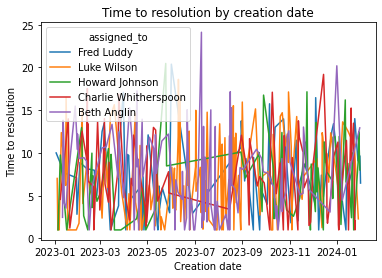

In [14]:
# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

sns.lineplot(x=df["opened_at"], y=df["resolution_time"], hue=df["assigned_to"])
plt.xlabel("Creation date")
plt.ylabel("Time to resolution")
plt.title("Time to resolution by creation date")

#### Generate JSON Description for the Insight

In [15]:
{
    "data_type": "analytical",
    "insight": "The resolution time (TTR) for Beth Anglin and Luke Wilson remains uniform over the entire timeline",
    "insight_value": {
        "observation": "Consistent TTR indicating sustained productivity despite increased workload"
    },
    "plot": {
        "plot_type": "line",
        "title": "Trend of Resolution Time (TTR) for Beth Anglin and Luke Wilson Over Time",
        "x_axis": {
            "name": "Time",
            "value": "Timeline from the start to the end of the data set",
            "description": "This axis represents the timeline over which the TTR data is analyzed."
        },
        "y_axis": {
            "name": "Resolution Time (days)",
            "value": "Measured TTR in days",
            "description": "This represents the time taken to resolve incidents, measured in days."
        },
        "description": "The line plot illustrates the trend of resolution times for Beth Anglin and Luke Wilson throughout the analyzed period. Despite a noticeable increase in their workload during the absence of other agents, the TTR remains consistently uniform across the timeline. This indicates that Beth Anglin and Luke Wilson were able to maintain their productivity and service quality even under increased workload conditions."
    },
    "question": "How does the resolution time (TTR) for incidents handled by Beth Anglin and Luke Wilson during this period compare to other times?",
    "actionable_insight": "The consistent TTR achieved by Beth Anglin and Luke Wilson, even during periods of increased workload, underscores their efficiency and capability in managing incidents effectively. It is advisable to recognize their resilience and perhaps consider them for further training and leadership roles in managing workflow. Additionally, their strategies and work habits could be studied and possibly replicated across the team to enhance overall productivity and service quality."
}

{'data_type': 'analytical',
 'insight': 'The resolution time (TTR) for Beth Anglin and Luke Wilson remains uniform over the entire timeline',
 'insight_value': {'observation': 'Consistent TTR indicating sustained productivity despite increased workload'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Resolution Time (TTR) for Beth Anglin and Luke Wilson Over Time',
  'x_axis': {'name': 'Time',
   'value': 'Timeline from the start to the end of the data set',
   'description': 'This axis represents the timeline over which the TTR data is analyzed.'},
  'y_axis': {'name': 'Resolution Time (days)',
   'value': 'Measured TTR in days',
   'description': 'This represents the time taken to resolve incidents, measured in days.'},
  'description': 'The line plot illustrates the trend of resolution times for Beth Anglin and Luke Wilson throughout the analyzed period. Despite a noticeable increase in their workload during the absence of other agents, the TTR remains consistently uniform acr

### **Question-7:** What are the potential consequences of not addressing the anomaly or trend of increasing assignments during employee leave periods?


#### Plot projected increase in incident assignments for Beth Anglin from August 16, 2023.
This cell uses linear regression to predict future trends in the number of incidents assigned to Beth Anglin following a significant cutoff period marked by other agents leave. By analyzing historical data up to August 15, 2023, and forecasting beyond this date, the plot aims to highlight the potential consequences of not addressing imbalances during such leave periods. 

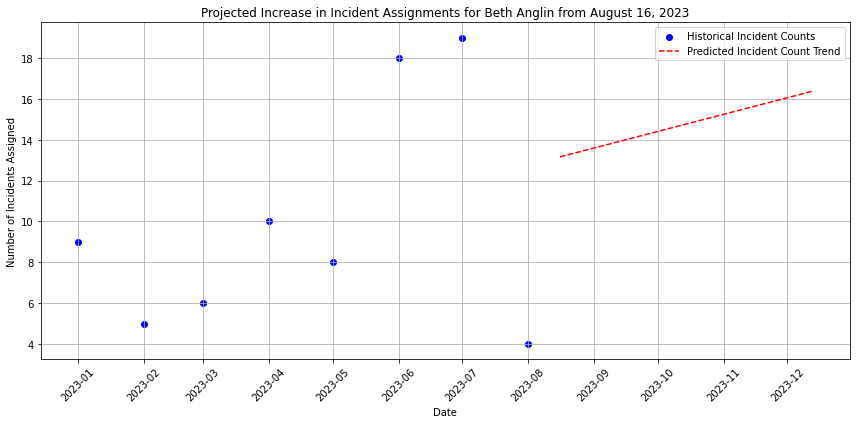

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load data
dataset_path = "csvs/flag-15.csv"


# Load the dataset
df = pd.read_csv(dataset_path)
df = df[df['assigned_to'] == 'Beth Anglin']
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Define the cutoff date for the training data
cutoff_date = pd.to_datetime("2023-08-15")

# Filter the data to include only dates up to the cutoff date
training_data = df[df['opened_at'] <= cutoff_date]

# Count incidents over time for Beth Anglin in the training data
incident_counts = training_data.groupby(training_data['opened_at'].dt.to_period("M")).size().reset_index(name='counts')
incident_counts['date_ordinal'] = incident_counts['opened_at'].dt.start_time.apply(lambda x: x.toordinal())

# Prepare data for linear regression
X = incident_counts['date_ordinal'].values.reshape(-1, 1)  # Reshape for sklearn
y = incident_counts['counts'].values  # Target variable: number of incidents

# Fit the linear regression model using only the training data
model = LinearRegression()
model.fit(X, y)

# Define the start date for forecasting
forecast_start_date = pd.to_datetime("2023-08-16")

# Generate future dates from the specified start date
future_dates = pd.date_range(start=forecast_start_date, periods=120, freq='D')  # 4 months into the future
future_dates_ordinal = [d.toordinal() for d in future_dates]
future_preds = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(incident_counts['opened_at'].dt.start_time, y, color='blue', label='Historical Incident Counts')
plt.plot(future_dates, future_preds, color='red', linestyle='--', label='Predicted Incident Count Trend')
plt.title('Projected Increase in Incident Assignments for Beth Anglin from August 16, 2023')
plt.xlabel('Date')
plt.ylabel('Number of Incidents Assigned')
plt.legend()
plt.grid(True)

# Formatting the x-axis to make it more readable
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [17]:
{
    "data_type": "predictive",
    "insight": "There would be a continued increase in assignments for Beth Anglin if the trend during leave periods is not addressed",
    "insight_value": {
        "trend": "Linear Increase",
        "prediction": "Continued escalation in assignments"
    },
    "description": "The forecast model indicates a linear increase in the number of incidents assigned to Beth Anglin over time, starting from the date immediately following that other agents have not yet returned to work or for any other reasons. This trend suggests that if proactive measures are not taken to address the distribution of work during leave periods, Beth Anglin could continue to face an increasing workload. Such a scenario could lead to potential burnout, decreased job satisfaction, and reduced overall effectiveness in handling incidents.",
    "recommendation": {
        "action": "Implement proactive workload management strategies",
        "expected_outcome": "Prevent workload escalation and maintain balanced distribution",
        "urgency": "High"
    },
    "actionable_insight": "To mitigate the risk of continued workload escalation for Beth Anglin, it is crucial to implement proactive workload management strategies. These might include cross-training other agents to handle similar types of incidents, creating a more robust backup system for periods of high leave, or even reevaluating current leave policies to ensure that no single agent is overwhelmed. Regular review and adjustment of workload distribution, especially during peak leave times, will help maintain a balanced workload and prevent the negative consequences of overburdening individual team members."
}

{'data_type': 'predictive',
 'insight': 'There would be a continued increase in assignments for Beth Anglin if the trend during leave periods is not addressed',
 'insight_value': {'trend': 'Linear Increase',
  'prediction': 'Continued escalation in assignments'},
 'description': 'The forecast model indicates a linear increase in the number of incidents assigned to Beth Anglin over time, starting from the date immediately following that other agents have not yet returned to work or for any other reasons. This trend suggests that if proactive measures are not taken to address the distribution of work during leave periods, Beth Anglin could continue to face an increasing workload. Such a scenario could lead to potential burnout, decreased job satisfaction, and reduced overall effectiveness in handling incidents.',
 'recommendation': {'action': 'Implement proactive workload management strategies',
  'expected_outcome': 'Prevent workload escalation and maintain balanced distribution',
  'ur

### Summary of Findings (Flag 15):

1. **Disparity in Incident Assignments**: During the period from June to August 2023, Beth Anglin and Luke Wilson received significantly higher incident assignments compared to their peers. This disparity highlights potential issues in workload distribution among the team.
2. **Impact of Leave Periods**: Specific leave periods for agents like Howard Johnson, Charlie Whitherspoon, and Fred Luddy were identified. The analysis suggests that these leave periods correlate with the increased assignments to Beth and Luke, indicating that their workload may be a direct consequence of the absence of other team members.
3. **Efficiency Despite Increased Workload**: Despite the heavier workload, Beth Anglin and Luke Wilson have maintained consistent turnaround times. This efficiency suggests they are capable of managing a higher number of incidents effectively but also raises concerns about long-term sustainability and risk of burnout.
